In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the excel file as DataFrame

bank = pd.read_excel("/content/CHURNDATA (1).xlsx")

In [ ]:
# Printing top 5 rows and columns

bank.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [ ]:
# Seeing last 5 rows and columns
bank.tail()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.0,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.0,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.0,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.0,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE
1248,XXXXXX,Feb 23 1961 12:00AM,58,5000000.0,FEMALE,SINGLE,2005-07-26,14,76,88,...,422000.00,214350.00,761827.91,233,666850.00,37,270,2222,MIDLE,ACTIVE


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [ ]:
bank.columns.unique()

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

# Exploratory data analysis

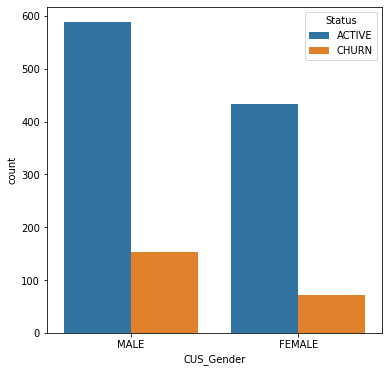

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=bank, x="CUS_Gender", hue="Status")
plt.show()

<Figure size 540x540 with 0 Axes>

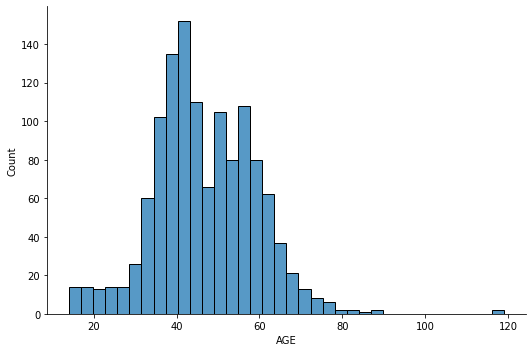

In [ ]:
plt.figure(figsize=(6, 6), dpi=90)
sns.displot(bank["AGE"], aspect=1.5)
plt.show()

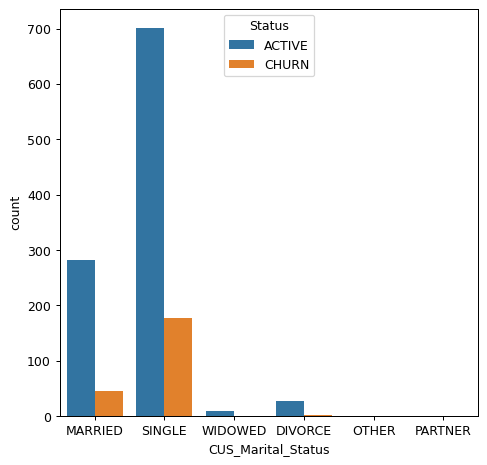

In [ ]:
plt.figure(figsize=(6, 6), dpi=90)
sns.countplot(data=bank, x="CUS_Marital_Status", hue="Status")
plt.show()

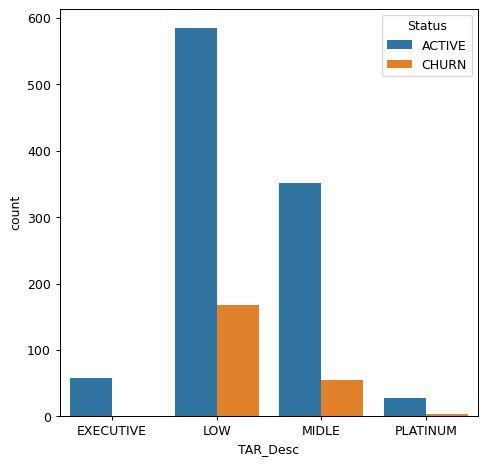

In [ ]:
plt.figure(figsize=(6, 6), dpi=90)
sns.countplot(data=bank, x="TAR_Desc", hue="Status")
plt.show()

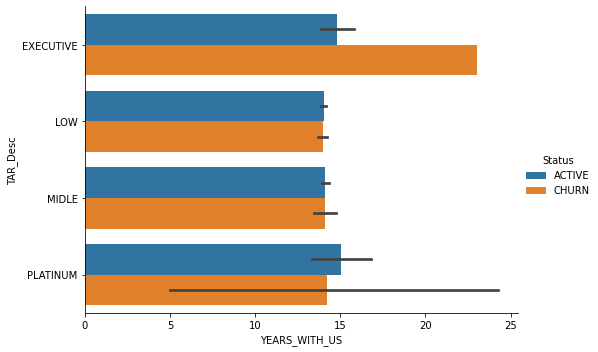

In [ ]:
sns.catplot(data=bank, x="YEARS_WITH_US", y="TAR_Desc", kind="bar", hue="Status", aspect=1.5)
plt.show()

In [ ]:
# function for trans_Debit and trans_Credict
def hist(arr):
    for i in arr:
        sns.displot(bank[i], aspect=1.5)
        plt.show()

In [ ]:
trans_debit = ['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3']
total_debit = ['total debit amount for S1','total debit amount for S2', 'total debit amount for S3']
trans_credit = ['# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3']
total_credit = ['total credit amount for S1','total credit amount for S2', 'total credit amount for S3']

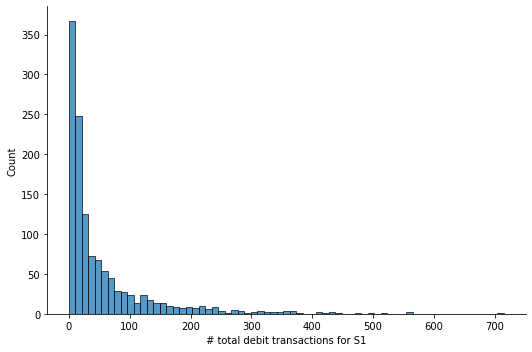

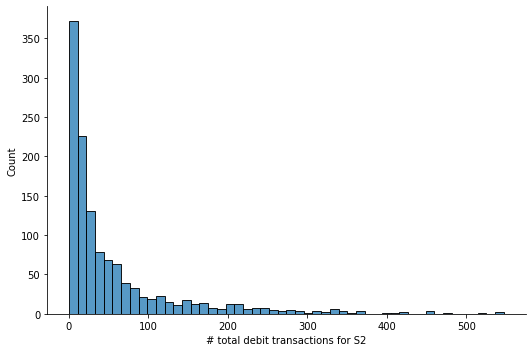

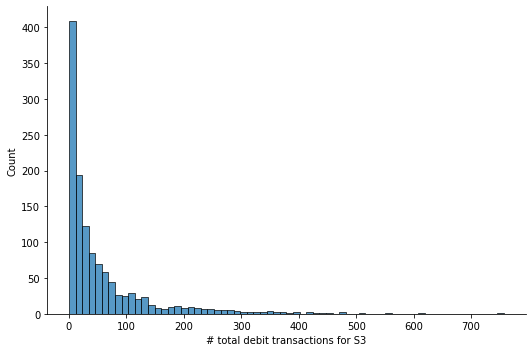

In [ ]:
# Transaction debit for s1/s2/s3
hist(trans_debit)

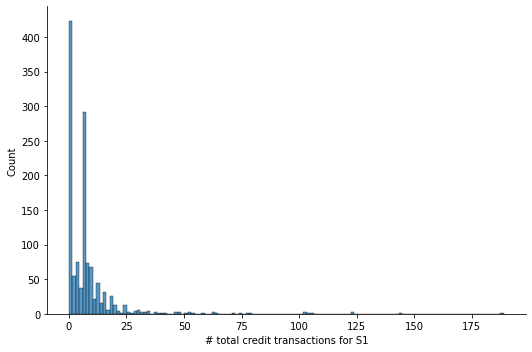

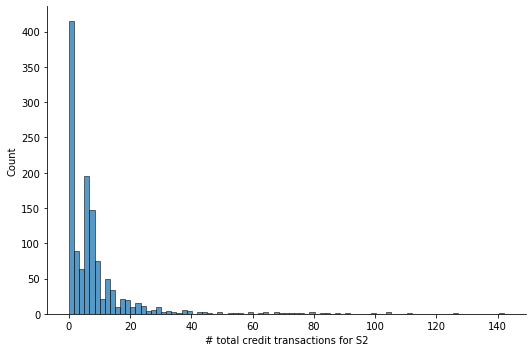

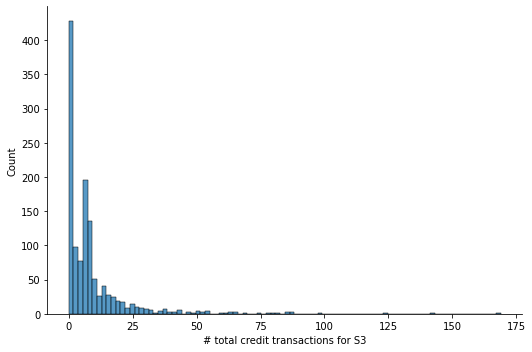

In [ ]:
# Transaction Credit for s1/s2/s3
hist(trans_credit)

In [ ]:
# Converted the DOB to datetime format and set the customers year
bank["CUS_birth_year"] = pd.to_datetime(bank["CUS_DOB"]).dt.year

In [ ]:
bank["CUS_birth_year"].max()

2005

In [ ]:
bank["CUS_birth_year"].min()

1900

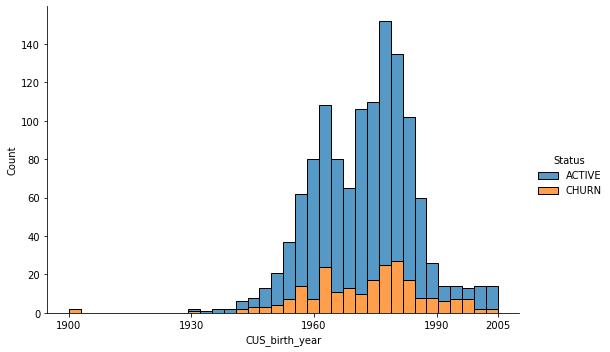

In [ ]:
# plt.figure(figsize=(6, 6), dpi=90)
sns.displot(data=bank, x="CUS_birth_year", hue="Status", aspect=1.5, multiple="stack")
plt.xticks([1900, 1930, 1960, 1990, 2005])
plt.show()

In [ ]:
# Finding unique value count
bank.value_counts()

CIF     CUS_DOB              AGE  CUS_Month_Income  CUS_Gender  CUS_Marital_Status  CUS_Customer_Since  YEARS_WITH_US  # total debit transactions for S1  # total debit transactions for S2  # total debit transactions for S3  total debit amount for S1  total debit amount for S2  total debit amount for S3  # total credit transactions for S1  # total credit transactions for S2  # total credit transactions for S3  total credit amount for S1  total credit amount for S2  total credit amount for S3  total debit amount  total debit transactions  total credit amount  total credit transactions  total transactions  CUS_Target  TAR_Desc  Status  CUS_birth_year
XXXXXX  Apr  2 1958 12:00AM  61   8000000.0         MALE        SINGLE              2005-05-27          14             7                                  0                                  0                                  3843.60                    0.00                       0.00                       1                                   0  

###Datacleaning

In [ ]:
#Deleting the column which is not useful
del bank["CIF"]

In [ ]:
# Checking for duplicate rows
print("number of duplicates:", bank.duplicated().sum())

number of duplicates: 0


In [ ]:
print(bank.isnull().sum())

CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target      

In [ ]:
# Dropping np.nan values
bank.dropna(inplace=True)

In [ ]:
print(bank.isnull().sum())

CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0


In [ ]:
remove1 = ["CUS_DOB", "CUS_Customer_Since","# total debit transactions for S1","# total debit transactions for S2","# total debit transactions for S3",
          "total debit amount for S1","total debit amount for S2","total debit amount for S3","total credit amount for S1","total credit amount for S2",
          "total credit amount for S3","# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3","total transactions"]
bank.drop(remove1, axis=1, inplace=True)
bank.head()


,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,49,7116.64,MALE,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,ACTIVE,1970
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,ACTIVE,1973
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,ACTIVE,1966
3,15,500.00,FEMALE,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,ACTIVE,2004
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,ACTIVE,1971


In [ ]:
print(bank["CUS_Gender"].unique())
print(bank["Status"].unique())

['MALE' 'FEMALE']
['ACTIVE' 'CHURN']


### Imbalance


In [ ]:
bank["Status"].value_counts() 

ACTIVE    1015
CHURN      223
Name: Status, dtype: int64

In [ ]:
# male = 1, female = 0

bank["CUS_Gender"] = bank["CUS_Gender"].replace({"MALE": 1, "FEMALE":0})

In [ ]:
bank["TAR_Desc"].unique()

array(['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM'], dtype=object)

In [ ]:
#correcting the spelling

bank["TAR_Desc"] = bank["TAR_Desc"].replace("MIDLE", "MIDDLE")

In [ ]:
bank["CUS_Marital_Status"] = LabelEncoder().fit_transform(bank["CUS_Marital_Status"])

In [ ]:
bank["TAR_Desc"] = LabelEncoder().fit_transform(bank["TAR_Desc"])

In [ ]:
bank.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,49,7116.64,1,1,25,4758311.63,887,5659653.33,65,2231,0,ACTIVE,1970
1,46,1500000.00,0,4,14,139363.22,97,87000.00,10,2223,1,ACTIVE,1973
2,53,5000000.00,0,4,14,37375.46,53,1020883.70,27,2222,2,ACTIVE,1966
3,15,500.00,0,4,14,4000.00,1,76946.96,12,2223,1,ACTIVE,2004
4,48,9000000.00,0,4,5,338470.29,60,442100.00,21,2223,1,ACTIVE,1971


In [ ]:
#Checking the shape to find the numbers of rows and columns

bank.shape

(1238, 13)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1248
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1238 non-null   int64  
 1   CUS_Month_Income           1238 non-null   float64
 2   CUS_Gender                 1238 non-null   int64  
 3   CUS_Marital_Status         1238 non-null   int64  
 4   YEARS_WITH_US              1238 non-null   int64  
 5   total debit amount         1238 non-null   float64
 6   total debit transactions   1238 non-null   int64  
 7   total credit amount        1238 non-null   float64
 8   total credit transactions  1238 non-null   int64  
 9   CUS_Target                 1238 non-null   int64  
 10  TAR_Desc                   1238 non-null   int64  
 11  Status                     1238 non-null   object 
 12  CUS_birth_year             1238 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage:

#Spliting the feature variable and target variables

In [ ]:
#Splitting the feature variables and target variables
X = bank.drop("Status", axis=1).values
y = bank.iloc[:, -2].values

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,49.0,7116.64,1.0,1.0,25.0,4758311.63,887.0,5659653.33,65.0,2231.0,0.0,1970.0
1,46.0,1500000.00,0.0,4.0,14.0,139363.22,97.0,87000.00,10.0,2223.0,1.0,1973.0
2,53.0,5000000.00,0.0,4.0,14.0,37375.46,53.0,1020883.70,27.0,2222.0,2.0,1966.0
3,15.0,500.00,0.0,4.0,14.0,4000.00,1.0,76946.96,12.0,2223.0,1.0,2004.0
4,48.0,9000000.00,0.0,4.0,5.0,338470.29,60.0,442100.00,21.0,2223.0,1.0,1971.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,68.0,4500.00,1.0,4.0,14.0,5645.60,26.0,0.00,0.0,2223.0,1.0,1951.0
1234,35.0,3500000.00,1.0,4.0,14.0,385735.90,127.0,674630.41,22.0,2222.0,2.0,1984.0
1235,34.0,1000.00,1.0,4.0,14.0,2473621.68,1207.0,2641348.01,217.0,2232.0,2.0,1985.0
1236,69.0,2000000.00,1.0,4.0,14.0,1371852.22,583.0,1310768.35,48.0,2222.0,2.0,1950.0


In [ ]:
y = pd.DataFrame(y)
y

,0
0,ACTIVE
1,ACTIVE
2,ACTIVE
3,ACTIVE
4,ACTIVE
...,...
1233,CHURN
1234,ACTIVE
1235,ACTIVE
1236,ACTIVE


In [ ]:
#Splitting the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Having a look at their shape
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(990, 12)
(248, 12)
(990, 1)
(248, 1)


In [ ]:
bank.drop("Status", axis=1)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,CUS_birth_year
0,49,7116.64,1,1,25,4758311.63,887,5659653.33,65,2231,0,1970
1,46,1500000.00,0,4,14,139363.22,97,87000.00,10,2223,1,1973
2,53,5000000.00,0,4,14,37375.46,53,1020883.70,27,2222,2,1966
3,15,500.00,0,4,14,4000.00,1,76946.96,12,2223,1,2004
4,48,9000000.00,0,4,5,338470.29,60,442100.00,21,2223,1,1971
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,1,4,14,5645.60,26,0.00,0,2223,1,1951
1245,35,3500000.00,1,4,14,385735.90,127,674630.41,22,2222,2,1984
1246,34,1000.00,1,4,14,2473621.68,1207,2641348.01,217,2232,2,1985
1247,69,2000000.00,1,4,14,1371852.22,583,1310768.35,48,2222,2,1950


In [ ]:
#Feature Scaling by using StandardScaler 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


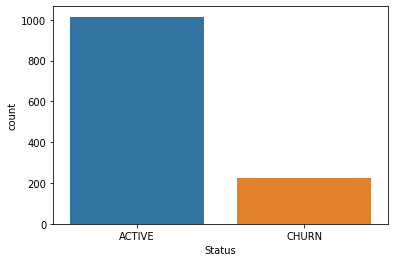

In [ ]:
#Using countplot from seaborn to check the distribution of labels in bank["Status"]
sns.countplot(bank["Status"])

In [ ]:
#Checking for distribution of labels
y_train.value_counts(normalize=True)

ACTIVE    0.822222
CHURN     0.177778
dtype: float64

### Logistic Regression

In [ ]:
#WE will add class weight due to class imbalance 

#lr_basemodel = linear_model.LogisticRegression(class_weight={"ACTIVE":0.18, "CHURN":0.82})
lr_basemodel = linear_model.LogisticRegression(class_weight={"ACTIVE":0.18, "CHURN":0.83})

#train model to learn relationships between input and output variables
lr_basemodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={'ACTIVE': 0.18, 'CHURN': 0.83})

In [ ]:
#Predicted outcome from the X_test against the model

predicted = lr_basemodel.predict(X_test)

In [ ]:
#Using the metric to find the accuracy score

from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted)

0.7016129032258065

In [ ]:
#Evalution 
#Confusion Matrix

print(metrics.confusion_matrix(y_test, predicted))

[[133  68]
 [  6  41]]


In [ ]:
#Classification report 

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

      ACTIVE       0.96      0.66      0.78       201
       CHURN       0.38      0.87      0.53        47

    accuracy                           0.70       248
   macro avg       0.67      0.77      0.65       248
weighted avg       0.85      0.70      0.73       248



### Random Forest

In [ ]:
#WE will add class weight due to class imbalance 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight={"ACTIVE":0.18, "CHURN":0.83})

#train model to learn relationships between input and output variables
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(class_weight={'ACTIVE': 0.18, 'CHURN': 0.83})

In [ ]:
#Predicted outcome from the X_test against the model

predicted = rf.predict(X_test)

In [ ]:
#Using the metric to find the accuracy score

from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted)

0.8548387096774194

In [ ]:
#Evalution 
#Confusion Matrix

print(metrics.confusion_matrix(y_test, predicted))

[[193   8]
 [ 28  19]]


In [ ]:
#Classification report 

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

      ACTIVE       0.87      0.96      0.91       201
       CHURN       0.70      0.40      0.51        47

    accuracy                           0.85       248
   macro avg       0.79      0.68      0.71       248
weighted avg       0.84      0.85      0.84       248



# Pickle File

In [ ]:
#Flattening the entire intelligence of Machine learning model
import pickle

pickle.dump(rf, open("rf.pkl", "wb"))